# Определение перспективного тарифа для телеком компании

### Навигация по проекту
1. [Изучение общей информации](#section1)
    - [Датасет Calls](#section1.1)
    - [Датасет Internet](#section1.2)
    - [Датасет Messages](#section1.3)
    - [Датасет Tariffs](#section1.4)
    - [Датасет Users](#section1.5)
2. [Подготовка данных](#section2)
3. [Анализ данных](#section3)
    - [Звонки](#section3.1)
    - [Сообщения](#section3.2)
    - [Интернет](#section3.3)
    - [Выручка](#section3.4)
    - [Вывод](#section3.5)
4. [Проверка гипотез](#section4)
    - [Гипотеза №1](#section4.1)
    - [Гипотеза №2](#section4.2)
    - [Гипотеза №3](#section4.3)
5. [Общий вывод](#section5)

### Импортируем необходимые модули

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math

<a id='section1'></a>
### Шаг 1. Откроим файлы с данными и изучим общую информацию. 

<a id='section1.1'></a>
### Датасет calls

In [2]:
# звонки
calls = pd.read_csv('/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.tail()

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls['user_id'].unique().shape

(492,)

В таблице звонков **202607** объектов, пропусков нет. Признаки **id** и **call_date** имеют тип object. Так как **call_date** содержит дату, то его можно привести к типу **datetime**. В начале **id** стоит соответсвующий ему **user_id**, затем после нижнего подчеркивания идет номер звонка.\
Уникальных **user_id** всего 492 значения.

<a id='section1.2'></a>
### Датасет internet

In [6]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.tail()

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
internet['user_id'].unique().shape

(497,)

В таблице об интернет-сессиях **149396** объектов, пропусков нет. Аналогично предыдущему датасету есть два признака с типом **object**, также есть соответствие между **id** и **user_id**, причем уникальных значения у **user_id** больше, чем у предыдущего.\
Также есть признак **Unnamed: 0** дублирующий индекс строки, видимо, созданный по ошибке.

<a id='section1.3'></a>
### Датасет Messages

In [10]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
messages.tail()

,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
messages['user_id'].unique().shape

(426,)

В данных **123036** объектов, пропусков также нет. В данной таблице заметно меньше уникальных user_id по сравнению с предыдущими.

<a id='section1.4'></a>
### Датасет Tariffs

In [14]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В данном датасете представлена информация о тарифах **Smart** и **Ultra**.

<a id='section1.5'></a>
### Датасет Users

In [15]:
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
users.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В данном датасете представлена информация о пользователях. Всего пользователей **500**. У признака **churn_date** большинство данных заполнено NaN, означающим, что пользователь пользуется тарифом на момент выгрузки данных.\
Признак **reg_date** содержит дату начала пользования тарифом, поэтому его можно привести к типу **datetime**.

<a id='section2'></a>
### Шаг 2. Подготовка данных

In [18]:
# приведем данные к нужному типу, в частности, даты
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [19]:
# посмотрим на количество дубликатов
print(calls.duplicated().sum())
print(internet.duplicated().sum())
print(messages.duplicated().sum())
print(users.duplicated().sum())

0
0
0
0


**Посмотрим на таблицы calls и internet.**\
Заметим, что сотовый оператор всегда округляет минуты разговора и мегабайты вверх, то есть если пользователь проговорил 1,3 секунды, то будет будет засчитано 2 секунду. В случае с мегабайтами округление происходит немного иначе: округление происходит не после каждой интернет-сессии (как при звонках), а раз в месяц. Поэтому мегабайты стоит сначала суммировать, а потом округлять, звонки - наоборот. Данный факт необходимо учесть в дальнейшем.\
Создадим дополнительные столбцы с округленными минутами и мегабайтами.

In [20]:
calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [21]:
# округление длительности каждого звонка
calls['duration_round'] = calls['duration'].apply(math.ceil).astype(int)

In [22]:
# удалим ненужный столбец из датасета internet
internet = internet.drop(internet.columns[0], axis=1)
# internet['mb_used_round'] = internet['mb_used'].apply(lambda x: math.ceil(x))
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [23]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

In [24]:
internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Нужно ли как-либо обрабатывать нулевые значения у признаков **duration** и **mb_used** у таблиц **calls и internet**?\
В первом случае, как указано в описании проекта, нулевыми значениями могут быть пропущенные звонки или же ошибочно обработанные данные (например, длительность разговора меньше 1 секунды могла засчитаться, как 0).\
В случае с интернетом немного сложнее, так как нулевые значения могут характеризовать попытки пользователя войти в интернет при нулевом трафике и невозможности купить дополнительные гигобайты интернет-трафика, также это могут быть ошибочно обработанные данные.\
На мой взгляд, на этом этапе с ними делать ничего не нужно. Возможно, дальнейшее исследование даст более четкий ответ на данный вопрос.\
Также я решил пока не объединять все таблицы в одну, чтобы не создавать в итоговой таблице множество похожих объектов с различиями в двух-трех признаках.

- **Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам.**

In [25]:
# для этого нам потребуется датафрейм calls
calls.head()

,id,call_date,duration,user_id,duration_round
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


In [26]:
calls['month'] = calls['call_date'].dt.month

In [27]:
calls_grouped = calls.pivot_table(index=['user_id', 'month'],
                                  values=['duration_round'],
                                  aggfunc=['sum', 'count']).reset_index() # values=['duration', 'duration_round']
calls_grouped.columns = ['user_id', 'month', 'duration_round_sum','calls_count'] #['user_id', 'month', 'duration_sum', 'duration_round_sum','calls_count', 'count']

In [28]:
#calls_grouped = calls_grouped.drop(['count'], axis=1)
calls_grouped

,user_id,month,duration_round_sum,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


- **Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.**

In [29]:
messages['month'] = messages['message_date'].dt.month

In [30]:
msg_grouped = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
msg_grouped.columns = ['user_id', 'month','messages_count']
msg_grouped

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


- **Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.**

In [31]:
internet['month'] = internet['session_date'].dt.month

In [32]:
internet_grouped = internet.pivot_table(index=['user_id', 'month'],
                                        values=['mb_used'],
                                        aggfunc='sum').reset_index() #, 'mb_used_round'
internet_grouped.columns = ['user_id', 'month', 'mb_used_sum'] #, 'mb_used_round_sum'
internet_grouped

,user_id,month,mb_used_sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [33]:
# вот теперь можно перевести полученные мегабайт в гигабайты и округлить вверх
internet_grouped['gb_used_sum_round'] = (internet_grouped['mb_used_sum']/1024).apply(lambda x: math.ceil(x))
internet_grouped.head()

,user_id,month,mb_used_sum,gb_used_sum_round
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


In [34]:
# на данном этапе будет лучше объединить все таблицы в одну для удобства дальнейших рассчетов
data = pd.merge(calls_grouped, msg_grouped, on=['user_id', 'month'], how='outer')
data = pd.merge(data, internet_grouped, on=['user_id', 'month'],how='outer')
data = pd.merge(data, users.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1), on='user_id',how='outer')
data = pd.merge(data, tariffs, left_on='tariff', right_on='tariff_name',how='outer')
data.head()

,user_id,month,duration_round_sum,calls_count,messages_count,mb_used_sum,gb_used_sum_round,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5.0,159.0,22.0,22.0,2253.49,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6.0,172.0,43.0,60.0,23233.77,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7.0,340.0,47.0,75.0,14003.64,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8.0,408.0,52.0,81.0,14055.93,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9.0,466.0,58.0,57.0,14568.91,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra


- **Посчитаем помесячную выручку с каждого пользователя** (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [35]:
data['revenue_calls'] = (data['duration_round_sum']-data['minutes_included'])*data['rub_per_minute']
data['revenue_msg'] = (data['messages_count']-data['messages_included'])*data['rub_per_message']
# при подсчете выручки от дополнительного использования интернета переведем мб в гб
data['revenue_internet'] = (data['gb_used_sum_round'] - data['mb_per_month_included']/1024)*data['rub_per_gb']
#(((data['mb_used_round_sum'] - data['mb_per_month_included'])/1024)
#                            .apply(lambda x: math.ceil(x)))*data['rub_per_gb']

In [36]:
data.head(3)

,user_id,month,duration_round_sum,calls_count,messages_count,mb_used_sum,gb_used_sum_round,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue_calls,revenue_msg,revenue_internet
0,1000,5.0,159.0,22.0,22.0,2253.49,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,-2841.0,-978.0,-4050.0
1,1000,6.0,172.0,43.0,60.0,23233.77,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,-2828.0,-940.0,-1050.0
2,1000,7.0,340.0,47.0,75.0,14003.64,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,-2660.0,-925.0,-2400.0


In [37]:
# занулим отрицательные значения, так как они показывают, что лимит не был превышен и 
# дополнительных списаний у пользователя не будет
data.loc[data['revenue_calls'] < 0, 'revenue_calls'] = 0
data.loc[data['revenue_msg'] < 0, 'revenue_msg'] = 0
data.loc[data['revenue_internet'] < 0, 'revenue_internet'] = 0

In [38]:
# теперь посчитаем общую выручку с каждого пользователя по месяцам
data['revenue_total'] = data['revenue_calls'] + data['revenue_msg'] + data['revenue_internet'] + data['rub_monthly_fee']

In [39]:
data.head(3)

,user_id,month,duration_round_sum,calls_count,messages_count,mb_used_sum,gb_used_sum_round,city,tariff,messages_included,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue_calls,revenue_msg,revenue_internet,revenue_total
0,1000,5.0,159.0,22.0,22.0,2253.49,3.0,Краснодар,ultra,1000,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
1,1000,6.0,172.0,43.0,60.0,23233.77,23.0,Краснодар,ultra,1000,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
2,1000,7.0,340.0,47.0,75.0,14003.64,14.0,Краснодар,ultra,1000,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0


In [40]:
# посмотрим появились ли в данных дубликаты
data.duplicated().sum()

0

In [41]:
data.isna().sum()

user_id                    0
month                      2
duration_round_sum        42
calls_count               42
messages_count           499
mb_used_sum               13
gb_used_sum_round         13
city                       0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
tariff_name                0
revenue_calls             42
revenue_msg              499
revenue_internet          13
revenue_total            549
dtype: int64

In [47]:
# в данных есть пропуски, заполним их
data = data.fillna(0)

In [48]:
data.isna().sum()

user_id                  0
month                    0
duration_round_sum       0
calls_count              0
messages_count           0
mb_used_sum              0
gb_used_sum_round        0
city                     0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
revenue_calls            0
revenue_msg              0
revenue_internet         0
revenue_total            0
dtype: int64

В итоге была вычислена помесячная выручка сотового оператора с каждого пользователя.\
Сначала был учтен факт, что оператор округляет вверх минуты разговора и мегабайты использованного интернет-трафика. Мегабайты были переведены в гигабайты для подсчета выручки, так как оператор предоставляет дополнительный интернет только в гигабайтах, затем они были округлены.\
Далее были найдены все необходимые значения.

<a id='section3'></a>
### Шаг 3. Проанализируем данные.

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [49]:
# создадим две выборки по виду тарифа
data_ultra = data.query('tariff == "ultra"')
data_smart = data.query('tariff == "smart"')

In [50]:
print(data_ultra.shape)
print(data_smart.shape)

(986, 21)
(2230, 21)


<a id='section3.1'></a>
### Минуты разговора

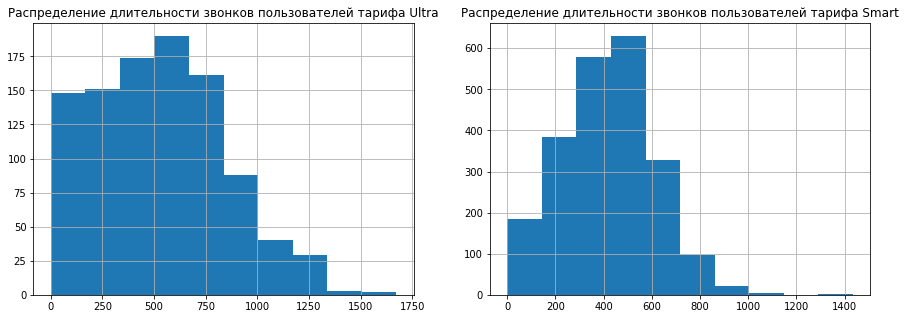

In [51]:
fg, ax = plt.subplots(1, 2, figsize=(15,5))
data_ultra['duration_round_sum'].hist(ax=ax[0])
data_smart['duration_round_sum'].hist(ax=ax[1])
ax[0].set_title('Распределение длительности звонков пользователей тарифа Ultra')
ax[1].set_title('Распределение длительности звонков пользователей тарифа Smart')
plt.show()

In [52]:
# посчитаем среднее, дисперсию и СКО для каждой выборки
print('Ultra:\n')
print('Mean of "Ultra" duration:', data_ultra['duration_round_sum'].mean())
print('Variance of "Ultra" duration:', data_ultra['duration_round_sum'].var(ddof=1))
print('Standard deviation of "Ultra" duration:', data_ultra['duration_round_sum'].std(ddof=1))
print('---------')
print('Smart:\n')
print('Mean of "Smart" duration:', data_smart['duration_round_sum'].mean())
print('Variance of "Smart" duration:', data_smart['duration_round_sum'].var(ddof=1))
print('Standard deviation of "Smart" duration:', data_smart['duration_round_sum'].std(ddof=1))

Ultra:

Mean of "Ultra" duration: 526.0892494929006
Variance of "Ultra" duration: 101052.49354928387
Standard deviation of "Ultra" duration: 317.8875485911392
---------
Smart:

Mean of "Smart" duration: 417.747533632287
Variance of "Smart" duration: 36281.39383644458
Standard deviation of "Smart" duration: 190.4767540579285


<a id='section3.2'></a>
### Количество сообщений

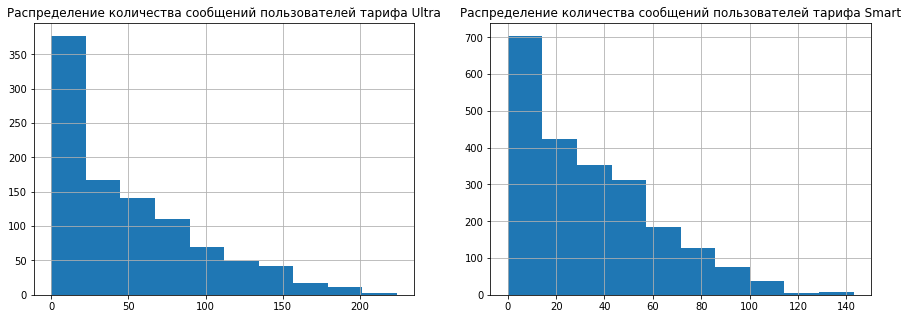

In [53]:
fg, ax = plt.subplots(1, 2, figsize=(15,5))
data_ultra['messages_count'].hist(ax=ax[0])
data_smart['messages_count'].hist(ax=ax[1])
ax[0].set_title('Распределение количества сообщений пользователей тарифа Ultra')
ax[1].set_title('Распределение количества сообщений пользователей тарифа Smart')
plt.show()

In [54]:
# посчитаем среднее, дисперсию и СКО для каждой выборки
print('Ultra:\n')
print('Mean of "Ultra" messages count:', data_ultra['messages_count'].mean())
print('Variance of "Ultra" messages count:', data_ultra['messages_count'].var(ddof=1))
print('Standard deviation of "Ultra" messages count:', data_ultra['messages_count'].std(ddof=1))
print('---------')
print('Smart:\n')
print('Mean of "Smart" messages count:', data_smart['messages_count'].mean())
print('Variance of "Smart" messages count:', data_smart['messages_count'].var(ddof=1))
print('Standard deviation of "Smart" messages count:', data_smart['messages_count'].std(ddof=1))

Ultra:

Mean of "Ultra" messages count: 49.31338742393509
Variance of "Ultra" messages count: 2285.4174246558414
Standard deviation of "Ultra" messages count: 47.80603962530092
---------
Smart:

Mean of "Smart" messages count: 33.36905829596412
Variance of "Smart" messages count: 796.9552557301129
Standard deviation of "Smart" messages count: 28.230395954185852


<a id='section3.3'></a>
### Объем интернет-трафика

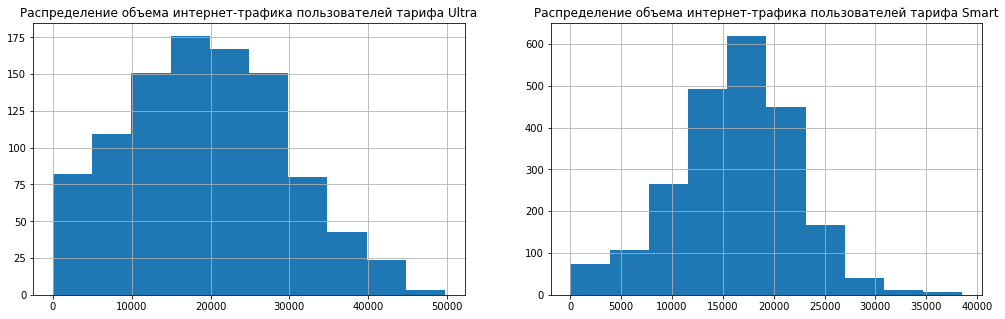

In [55]:
fg, ax = plt.subplots(1, 2, figsize=(17,5))
data_ultra['mb_used_sum'].hist(ax=ax[0])
data_smart['mb_used_sum'].hist(ax=ax[1])
ax[0].set_title('Распределение объема интернет-трафика пользователей тарифа Ultra')
ax[1].set_title('Распределение объема интернет-трафика пользователей тарифа Smart')
plt.show()

In [56]:
# посчитаем среднее, дисперсию и СКО для каждой выборки
print('Ultra:\n')
print('Mean of "Ultra" mb used:', data_ultra['mb_used_sum'].mean())
print('Variance of "Ultra" mb used:', data_ultra['mb_used_sum'].var(ddof=1))
print('Standard deviation of "Ultra" mb used:', data_ultra['mb_used_sum'].std(ddof=1))
print('---------')
print('Smart:\n')
print('Mean of "Smart" mb used:', data_smart['mb_used_sum'].mean())
print('Variance of "Smart" mb used:', data_smart['mb_used_sum'].var(ddof=1))
print('Standard deviation of "Smart" mb used:', data_smart['mb_used_sum'].std(ddof=1))

Ultra:

Mean of "Ultra" mb used: 19449.059969574035
Variance of "Ultra" mb used: 102032129.46482122
Standard deviation of "Ultra" mb used: 10101.095458653048
---------
Smart:

Mean of "Smart" mb used: 16201.118654708522
Variance of "Smart" mb used: 34564843.48129716
Standard deviation of "Smart" mb used: 5879.187314697258


<a id='section3.4'></a>
### Выручка

Исследуем также распределение выручки по каждому тарифу.

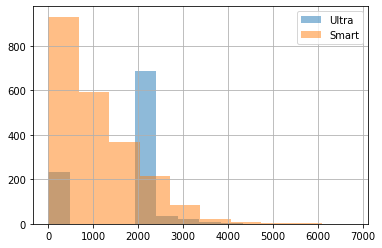

In [57]:
data_ultra['revenue_total'].hist(bins=10, alpha=0.5, label='Ultra')
data_smart['revenue_total'].hist(bins=10, alpha=0.5, label='Smart')
plt.legend()
plt.show()

In [58]:
# посчитаем минимум, максимум, среднее, дисперсию и СКО для каждой выборки
print('Ultra:\n')
print('Min of "Ultra" revenue:', data_ultra['revenue_total'].min())
print('Max of "Ultra" revenue:', data_ultra['revenue_total'].max())
print('Mean of "Ultra" revenue:', data_ultra['revenue_total'].mean())
print('Variance of "Ultra" revenue:', data_ultra['revenue_total'].var(ddof=1))
print('Standard deviation of "Ultra" revenue:', data_ultra['revenue_total'].std(ddof=1))
print('---------')
print('Smart:\n')
print('Min of "Smart" revenue:', data_smart['revenue_total'].min())
print('Max of "Smart" revenue:', data_smart['revenue_total'].max())
print('Mean of "Smart" revenue:', data_smart['revenue_total'].mean())
print('Variance of "Smart" revenue:', data_smart['revenue_total'].var(ddof=1))
print('Standard deviation of "Smart" revenue:', data_smart['revenue_total'].std(ddof=1))

Ultra:

Min of "Ultra" revenue: 0.0
Max of "Ultra" revenue: 4800.0
Mean of "Ultra" revenue: 1562.6774847870183
Variance of "Ultra" revenue: 845128.4583148857
Standard deviation of "Ultra" revenue: 919.3086849991605
---------
Smart:

Min of "Smart" revenue: 0.0
Max of "Smart" revenue: 6770.0
Mean of "Smart" revenue: 1108.362331838565
Variance of "Smart" revenue: 783534.4527751791
Standard deviation of "Smart" revenue: 885.1748148107124



<a id='section3.5'></a>
### Вывод 
**Звонки**:
- Распределение длительности звонков у пользователей тарифа Smart больше похоже на нормальное, по сравнению с тарифом Ultra.
- При этом есть пользователи тарифа Ultra, которые разговаривают больше 1500 минут, но нет пользователей, которые разговаривают больше 3000 минут, то есть больше предоставленных по тарифу бесплатных минут разговора. В случае с тарифом Smart, то здесь есть пользователи которые разговаривают аномальное количество минут в месяц, примерно 1400 минут при бесплатных 500.
- Что касается среднего и СКО, то пользователи тарифа Ultra в среднем разговаривают 545 минут со стандартным отклонением в 306 минут. Пользователи тарифа Smart в среднем разговаривают 421 минут со стандартным отклонением 187 минут. Можно заметить, что почти половина пользователей тарифа Smart тратит полностью свои бесплатные минуты разговора.

**Сообщения**:
- Распределения количества сообщений пользователей с тарифом Ultra и Smart скошены вправо.
- Среднее количество сообщений отправляемое пользователями тарифа Ultra равно 61, а тарифа Smart - 38. 
- Пользователей тарифа Smart, которые отправили больше 150 сообщений, нет, но зато почти 30% пользователей отправили больше 50 допустимых по тарифу сообщений. Пользователи тарифа Ultra отправляли в среднем больше сообщений, но при этом ни один из пользователей не отправил больше 230 сообщений при допустимых 3000.

**Интернет:**
- Распределения объема потраченного интернет-трафика у пользователей тарифа Smart и Ultra похожи по форме на нормальное распределение.
- В среднем пользователи тарифа Ultra тратят 20 Гб интернет-трафика, а пользователи тарифа Smart - 16 Гб. 
- Большая часть пользователей тарифа Ultra тратят от 10 до 30 гб интернет-трафика при положенных 30 Гб, но есть и те, кто покупает дополнительные пакеты интернета. Пользователи тарифа Ultra тратят в основном от 10 до 20 Гб при бесплатных 15 гб, при этом почти 60% пользователей использует больше 15 Гб.

**Выручка:**
- Как можно заметить, средняя выручка по тарифу *Ultra* больше, чем по тарифу *Smart* - примерно на 750 рублей.
- При этом дисперсия и ско у тарифа *Smart* больше.
- Стоит заметить, что минимальная выручка с одного пользователя по тарифу *Ultra* равна 1950 руб., по тарифу *Smart* - 550 руб. Разница достаточно существенная. При этом есть пользователи тарифа *Smart*, которые платят больше 5000 рублей, максимальная выручка по тарифу *Ultra* составляет 4880 рублей.

**Общий вывод:** пользователи тарифа Ultra в основном укладываются в рамки положенных по тарифу услуг, в отличие от пользователей тарифа Smart, которым нехватает предоставленных по тарифу услуг, поэтому им приходится переплачивать, в особенности, за услуги интернета.

<a id='section4'></a>
### Шаг 4. Проверим условия.

<a id='section4.1'></a>
**1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.**

Сформируем нулевую и альтернативную гипотезы.

$\begin{align}
& H_0 - средняя\ выручка\ пользователей\ тарифов\ Ultra\ равна\ средней\ выручке\ пользователей\ тарифов\ Smart.\\
& H_1 - средняя\ выручка\ пользователей\ тарифов\ Ultra\ и\ Smart\ различается.
\end{align}$

In [59]:
# возьмем уровень стат.значимости за 5%
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
    data_ultra['revenue_total'], 
    data_smart['revenue_total'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.052587794276283e-39
Отвергаем нулевую гипотезу


**Вывод:** отвергаем нулевую гипотезу и принимаем альтернативную, то есть средняя выручка пользователей тарифов Ultra и Smart различается.\
В данном случае гипотеза двусторонняя, так как нам необходимо сделать заключение о равенстве средних выручек двух тарифов, то есть различие может быть любого знака. Нулевая гипотеза всегда формируется о равенстве средних, альтернативная - наоборот.\
<font color=red> 

<a id='section4.2'></a>
**2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

Сформулируем нулевую и альтернативную гипотезы.

$\begin{align}
& H_0 - средняя\ выручка\ пользователей\ из\ Москвы\ равна\ выручке\ пользователей\ из\ других\ регионов.\\
& H_1 - средняя\ выручка\ пользователей\ из\ Москвы\ отличается\ от\ выручки\ пользователей\ из\ других\ регионов.\
\end{align}$

In [60]:
# выделим из данных пользователей из Москвы и из других регионов
data_Moscow = data.query('city == "Москва"')
data_rest = data.query('city != "Москва"')

In [61]:
# возьмем уровень стат.значимости за 5%
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
    data_Moscow['revenue_total'], 
    data_rest['revenue_total'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9591721970211647
Не получилось отвергнуть нулевую гипотезу


**Вывод:** нулевую гипотезу отвергнуть не удалось, поэтому средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.\
В данном случае гипотеза также двусторонняя, так как нам не важно меньше ли среднее какой-либо величины или больше, важно только то, что оно различается.

<a id='section4.3'></a>
**3. Я решил рассмотреть еще одну гипотезу, что средняя выручка пользователей тарифов «Ультра» меньше, чем «Смарт».**

Сформулируем нулевую и альтернативную гипотезы.

$\begin{align}
& H_0 - средняя\ выручка\ пользователей\ тарифов\ Ultra\ больше\ или\ равна\ средней\ выручке\ пользователей\ тарифов\ Smart.\\
& H_1 - средняя\ выручка\ пользователей\ тарифов\ Ultra\ меньше, чем\ пользователей\ тарифов\ Smart.
\end{align}$

In [62]:
mean_revenue_smart = data_smart['revenue_total'].mean()

alpha = 0.05 

results = st.ttest_1samp(data_ultra['revenue_total'], mean_revenue_smart)

print('p-значение:', results.pvalue/2)

if ( (results.pvalue/2 < alpha) & (data_ultra['revenue_total'].mean() < mean_revenue_smart)):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.7335106996335906e-49
Не получилось отвергнуть нулевую гипотезу


**Вывод:** нулевую гипотезу отвергнуть не удалось, поэтому средняя выручка пользователей тарифов *Ultra* больше или равна средней выручке пользователей тарифов *Smart*. Так как с помощью проверки первой гипотезы мы приняли, что выручки не равны, то есть различаются, а в данной гипотезе, что средняя выручка пользователей тарифов *Ultra* больше или равна средней выручке пользователей тарифов *Smart*, то можно сделать вывод, что средняя выручка пользователей тарифов *Ultra* больше, чем у пользователей *Smart'a*.\
В данном случае гипотеза односторонняя, так как нам нужно доказать увеличение или уменьшение параметра, то есть меньше ли средняя выручка пользователей тарифов *Ultra*.

<a id='section5'></a>
### Шаг 5. Общий вывод

В конечном итоге мною были проанализированы данные о 500 пользователях сотового оператора "Мегалайн".\
На первом этапе был проведен первичный взгляд на данные. Далее они были обработаны. Так было выявлено, что во всех таблицах столбцы с датой имеют тип *object*, также был найден лишний столбец в таблице `internet`.\
Также был учтен факт того, что оператор округляет минуты разговора и объем израсходованного интернет-трафика. Поэтому были созданы дополнительные столбцы с округленными данными: каждая длительность звонка была округлена, а затем просуммированна по месяцам для каждого пользователя, израсходованный интернет сначала был просуммирован, а затем округлен.\
Были посчитаны длительность разговоров, количество отправленных сообщений и объем израсходованного интернет трафика для каждого пользователя по месяцам. После чего появилась возможность посчитать выручку оператора с каждого пользователя в зависимости от используемого тарифа в месяц.\
К тому же были проанализированы данные клиентов о потраченных минутах разговора, количестве сообщений и интернет-трафике, в следствие чего был сделан вывод, что пользователи тарифа Ultra укладываются в рамки положенных по тарифу услуг, в отличие от пользователей тарифа Smart, которым нехватает предоставленных по тарифу услуг, поэтому им приходится переплачивать, в особенности, за услуги интернета.\
Несмотря на вышесказанное, выручка оператора с пользователей тарифов *Ultra* в среднем больше. Это было рассмотрено при проверке гипотез.\
Также была принята гипотеза, что  средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.\
**Какой тариф наиболее перспективный для телеком компании?**\
По результатам проведенного исследования можно сделать вывод, что пользователи обоих тарифов приносят выручку.\
Несмотря на то, что средняя выручка с пользователей тарифа *Ultra* больше, чем с тарифа *Smart*, на мой взгляд, тариф *Smart* имеет хорошие перспективы (в принципе, как и тариф *Ultra*).\
Его преимущество в том, что пользователей по данному тарифу больше, чем по тарифу *Smart*, так как, возможно, многим пользователям кажется, что они не воспользуются в полном объеме услугами тарифа *Ultra*, при этом многие смартовцы (если так можно выразиться) переплачивают за дополнительные звонки, сообщения и интернет.\
С другой стороны, может быть, уменьшив цену за тариф *Ultra* они увеличат количество пользователей, при этом увеличив выручку.\
Также как один из вариантов на будущее - введение промежуточного дополнительного тарифа.

In [6]:
!jupyter nbconvert --to pdf Определение_перспективного_тарифа_для_телеком_компании.ipynb

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | pattern 'Определение_перспективного_тарифа_для_телеком_компании.ipynb' matched no files
